# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

df = pd.read_csv('./dados.csv')

df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False


In [2]:
df['mau'] = df['mau'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             16650 non-null  int64  
 1   idade                  16650 non-null  float64
 2   tempo_emprego          16650 non-null  float64
 3   possui_celular         16650 non-null  int64  
 4   possui_fone_comercial  16650 non-null  int64  
 5   possui_fone            16650 non-null  int64  
 6   possui_email           16650 non-null  int64  
 7   qt_pessoas_residencia  16650 non-null  float64
 8   mau                    16650 non-null  int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 1.1 MB


In [3]:
treino, validacao = train_test_split(df, test_size=0.3, random_state=42)

X_treino = treino.drop('mau', axis=1)
y_treino = treino['mau']

X_val = validacao.drop('mau', axis=1)
y_val = validacao['mau']

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [4]:
clf = DecisionTreeClassifier(random_state=42)

In [5]:
clf.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

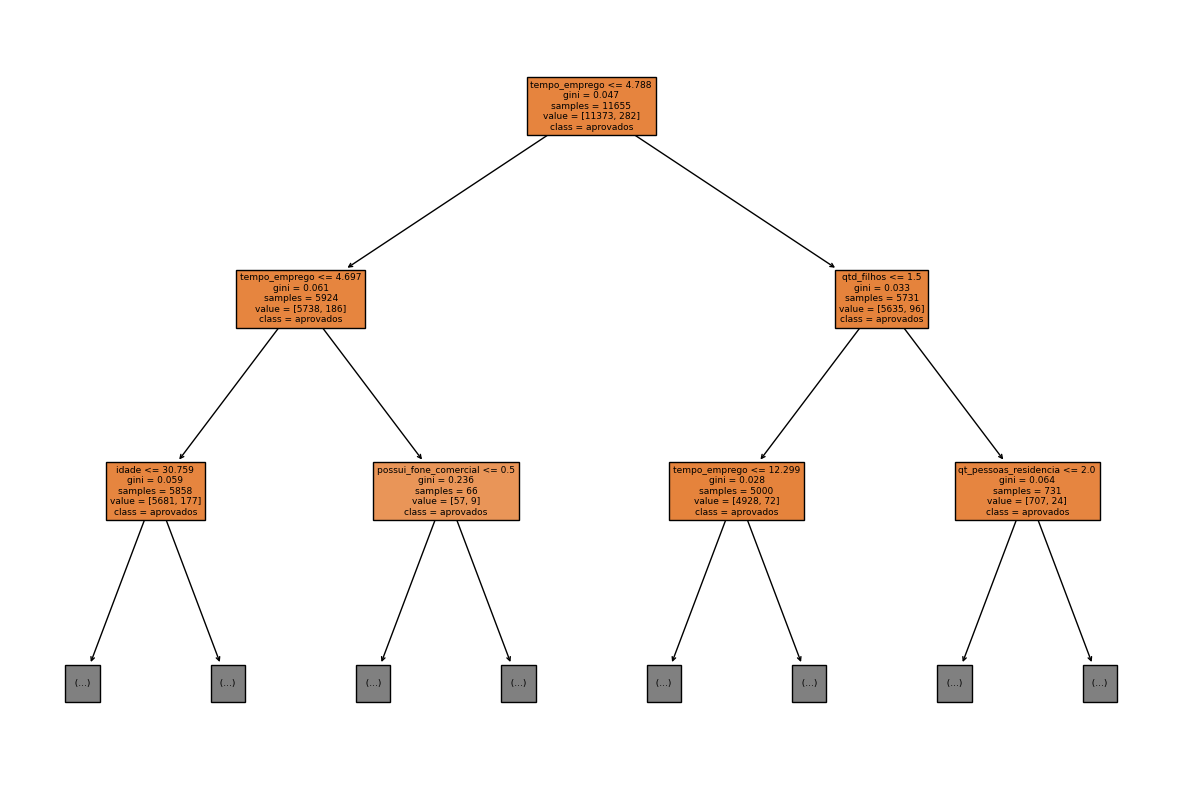

In [10]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X_treino.columns, class_names=["aprovados", "reprovados"], max_depth=2) #Limitei a profundidade pois estava demorando para carregar
plt.show

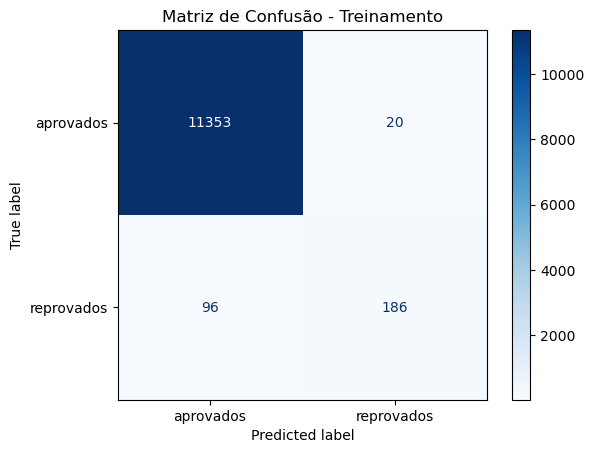

In [11]:
y_pred_treino = clf.predict(X_treino)
cm = confusion_matrix(y_treino, y_pred_treino)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Treinamento')
plt.show()

In [12]:
treino_acuracia = accuracy_score(y_treino, y_pred_treino)
print("Acurácia na base de treino:", treino_acuracia)

Acurácia na base de treino: 0.99004719004719


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [13]:
y_pred_teste = clf.predict(X_val)

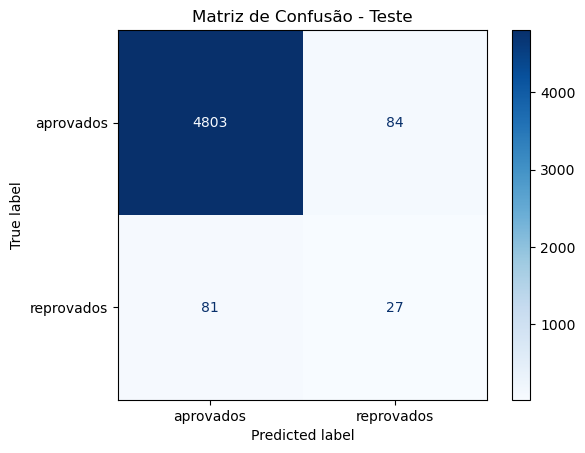

In [14]:
cm_test = confusion_matrix(y_val, y_pred_teste)
dt = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["aprovados", "reprovados"])
dt.plot(cmap='Blues')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [15]:
teste_acuracia = accuracy_score(y_val, y_pred_teste)
print("Acurácia na base de teste:", teste_acuracia)
print("Acurácia na base de treino:", treino_acuracia)


Acurácia na base de teste: 0.9669669669669669
Acurácia na base de treino: 0.99004719004719


In [16]:
clf_2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_2.fit(X_treino, y_treino)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

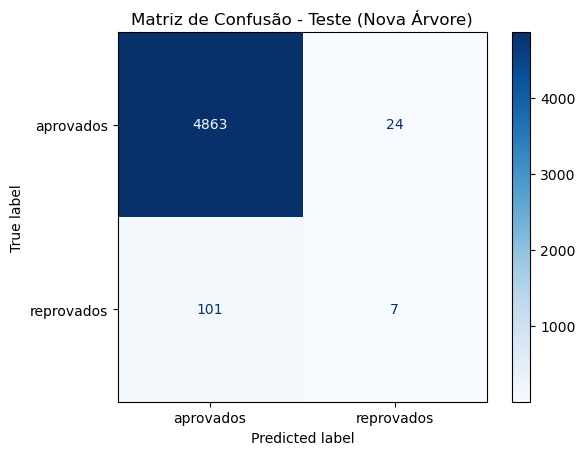

In [18]:
y_pred_teste_2 = clf_2.predict(X_val)
cm_teste_2 = confusion_matrix(y_val, y_pred_teste_2)
d_teste_2 = ConfusionMatrixDisplay(confusion_matrix=cm_teste_2, display_labels=["aprovados", "reprovados"])
d_teste_2.plot(cmap='Blues')
plt.title('Matriz de Confusão - Teste (Nova Árvore)')
plt.show()


In [19]:
print("Proporção de proponentes classificados como 'maus' na nova árvore:", sum(y_pred_teste_2) / len(y_pred_teste_2))

Proporção de proponentes classificados como 'maus' na nova árvore: 0.006206206206206206


In [20]:
acuracia_bons = y_val.value_counts(normalize=True).max()
print("Acurácia se todos os contratos fossem classificados como 'bons':", acuracia_bons)


Acurácia se todos os contratos fossem classificados como 'bons': 0.9783783783783784
